In [27]:
#all imports
%matplotlib inline
import pandas as pd
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
#from wordcloud import WordCloud, STOPWORDS

In [28]:
cwd = os.getcwd()
print(cwd)

C:\Users\Dell\Documents\Codes\Machine-Learning\CS520\ted-talks


In [29]:
ted_talks = pd.read_csv('ted_main.csv')

In [30]:
ted_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [31]:
transcripts = pd.read_csv('transcripts.csv')

In [32]:
transcripts.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [33]:
ted_talks.shape

(2550, 17)

In [34]:
transcripts.shape

(2467, 2)

In [35]:
ted_talks.url[0]

'https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n'

In [36]:
transcripts.url[0]

'https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n'

In [37]:
pop_talks = ted_talks[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,1140825600
1346,Your body language may shape who you are,Amy Cuddy,43155405,1340668800
677,How great leaders inspire action,Simon Sinek,34309432,1253145600
837,The power of vulnerability,Brené Brown,31168150,1275782400
452,10 things you didn't know about orgasm,Mary Roach,22270883,1233878400
1776,How to speak so that people want to listen,Julian Treasure,21594632,1370822400
201,My stroke of insight,Jill Bolte Taylor,21190883,1204070400
5,Why we do what we do,Tony Robbins,20685401,1138838400
2114,This is what happens when you reply to spam email,James Veitch,20475972,1449532800
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,1351296000


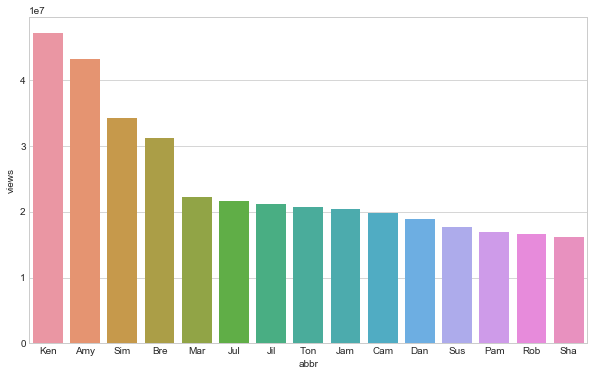

In [38]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

In [39]:

events = ted_talks[['title', 'event']].groupby('event').count().reset_index()
events.columns = ['event', 'talks']
events = events.sort_values('talks', ascending=False)
events.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


In [40]:
ted_talks.columns.values.tolist()

['comments',
 'description',
 'duration',
 'event',
 'film_date',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'published_date',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url',
 'views']

In [41]:
index_col = pd.DataFrame({ 'index' : range(0, ted_talks.shape[0] ,1)})

In [46]:
index_col.head()

,index
0,0
1,1
2,2
3,3
4,4


In [43]:
ted_talks['id'] = index_col

In [44]:
ted_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,1
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,3
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4


In [45]:
ted_talks.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2545
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2546
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2547
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,2548
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,2549


In [48]:
transcripts.columns.values.tolist()

['transcript', 'url']

In [50]:
index_col = pd.DataFrame({ 'index' : range(0, transcripts.shape[0] ,1)})

In [51]:
index_col.head()

,index
0,0
1,1
2,2
3,3
4,4


In [52]:
index_col.tail()

,index
2462,2462
2463,2463
2464,2464
2465,2465
2466,2466


In [53]:
transcripts['id'] = index_col

In [54]:
transcripts.head()

,transcript,url,id
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,0
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,1
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,2
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,3
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,4


In [67]:
transcripts[(transcripts.id == 0)].url == ted_talks[(ted_talks.id == 0)].url

0    True
Name: url, dtype: bool

In [65]:
ted_talks[(ted_talks.id == 502)].url

502    https://www.ted.com/talks/hans_rosling_at_state\n
Name: url, dtype: object

In [69]:
all_talks = pd.merge(left=ted_talks,right=transcripts, how='left', left_on='url', right_on='url')
all_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id_x,transcript,id_y
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0,Good morning. How are you?(Laughter)It's been ...,0.0
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,1,"Thank you so much, Chris. And it's truly a gre...",1.0
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2.0
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,3,If you're here today — and I'm very happy that...,3.0
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,4,"About 10 years ago, I took on the task to teac...",4.0


In [70]:
all_talks.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id_x,transcript,id_y
2548,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2545,"So, Ma was trying to explain something to me a...",2462.0
2549,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2546,This is a picture of a sunset on Mars taken by...,2463.0
2550,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2547,"In my early days as a graduate student, I went...",2464.0
2551,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,2548,I took a cell phone and accidentally made myse...,2465.0
2552,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,2549,"We humans are becoming an urban species, so ci...",2466.0


In [86]:
col = ['name', 'title', 'main_speaker']
ted_talks[col].head()

,name,title,main_speaker
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Ken Robinson
1,Al Gore: Averting the climate crisis,Averting the climate crisis,Al Gore
2,David Pogue: Simplicity sells,Simplicity sells,David Pogue
3,Majora Carter: Greening the ghetto,Greening the ghetto,Majora Carter
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,Hans Rosling


In [85]:
col = ['name', 'related_talks', 'main_speaker']
ted_talks[col].head()

,name,related_talks,main_speaker
0,Ken Robinson: Do schools kill creativity?,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Ken Robinson
1,Al Gore: Averting the climate crisis,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Al Gore
2,David Pogue: Simplicity sells,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",David Pogue
3,Majora Carter: Greening the ghetto,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Majora Carter
4,Hans Rosling: The best stats you've ever seen,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Hans Rosling


In [84]:
col = ['name', 'description', 'transcript']
all_talks[col].head()

,name,description,transcript
0,Ken Robinson: Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you?(Laughter)It's been ...
1,Al Gore: Averting the climate crisis,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
2,David Pogue: Simplicity sells,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Majora Carter: Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,Hans Rosling: The best stats you've ever seen,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


In [119]:
col = ['title', 'main_speaker', 'url', 'event']

all_talks[col].head()


,title,main_speaker,url,event
0,Do schools kill creativity?,Ken Robinson,https://www.ted.com/talks/ken_robinson_says_sc...,TED2006
1,Averting the climate crisis,Al Gore,https://www.ted.com/talks/al_gore_on_averting_...,TED2006
2,Simplicity sells,David Pogue,https://www.ted.com/talks/david_pogue_says_sim...,TED2006
3,Greening the ghetto,Majora Carter,https://www.ted.com/talks/majora_carter_s_tale...,TED2006
4,The best stats you've ever seen,Hans Rosling,https://www.ted.com/talks/hans_rosling_shows_t...,TED2006


In [120]:
ted_events = all_talks[col]
ted_events.rename(index=str, columns={'url': 'website_link'}, inplace=True)
ted_events.to_csv('ted_events.csv', sep=',', encoding='utf-8')
ted_events.head()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,title,main_speaker,website_link,event
0,Do schools kill creativity?,Ken Robinson,https://www.ted.com/talks/ken_robinson_says_sc...,TED2006
1,Averting the climate crisis,Al Gore,https://www.ted.com/talks/al_gore_on_averting_...,TED2006
2,Simplicity sells,David Pogue,https://www.ted.com/talks/david_pogue_says_sim...,TED2006
3,Greening the ghetto,Majora Carter,https://www.ted.com/talks/majora_carter_s_tale...,TED2006
4,The best stats you've ever seen,Hans Rosling,https://www.ted.com/talks/hans_rosling_shows_t...,TED2006


In [121]:
col = ['name', 'description', 'duration', 'film_date', 'languages', 'num_speaker', 'published_date', 'url']

all_talks[col].head()

,name,description,duration,film_date,languages,num_speaker,published_date,url
0,Ken Robinson: Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,1164,1140825600,60,1,1151367060,https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,With the same humor and humanity he exuded in ...,977,1140825600,43,1,1151367060,https://www.ted.com/talks/al_gore_on_averting_...
2,David Pogue: Simplicity sells,New York Times columnist David Pogue takes aim...,1286,1140739200,26,1,1151367060,https://www.ted.com/talks/david_pogue_says_sim...
3,Majora Carter: Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",1116,1140912000,35,1,1151367060,https://www.ted.com/talks/majora_carter_s_tale...
4,Hans Rosling: The best stats you've ever seen,You've never seen data presented like this. Wi...,1190,1140566400,48,1,1151440680,https://www.ted.com/talks/hans_rosling_shows_t...


In [122]:
talks = all_talks[col]

talks.to_csv('talks.csv', sep=',', encoding='utf-8')


In [123]:
col = ['name', 'ratings', 'comments', 'views', 'tags']

all_talks[col].head()

,name,ratings,comments,views,tags
0,Ken Robinson: Do schools kill creativity?,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",4553,47227110,"['children', 'creativity', 'culture', 'dance',..."
1,Al Gore: Averting the climate crisis,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",265,3200520,"['alternative energy', 'cars', 'climate change..."
2,David Pogue: Simplicity sells,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",124,1636292,"['computers', 'entertainment', 'interface desi..."
3,Majora Carter: Greening the ghetto,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",200,1697550,"['MacArthur grant', 'activism', 'business', 'c..."
4,Hans Rosling: The best stats you've ever seen,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",593,12005869,"['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [124]:
reviews = all_talks[col]
reviews.to_csv('reviews.csv', sep=',', encoding='utf-8')


In [127]:
col = ['title', 'transcript', 'url', 'related_talks']

all_talks[col].head()

,title,transcript,url,related_talks
0,Do schools kill creativity?,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im..."
1,Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im..."
2,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i..."
3,Greening the ghetto,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i..."
4,The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i..."


In [128]:
transcripts = all_talks[col]
transcripts.to_csv('transcript.csv', sep=',', encoding='utf-8')


In [129]:
col = ['main_speaker', 'speaker_occupation']

all_talks[col].head()

,main_speaker,speaker_occupation
0,Ken Robinson,Author/educator
1,Al Gore,Climate advocate
2,David Pogue,Technology columnist
3,Majora Carter,Activist for environmental justice
4,Hans Rosling,Global health expert; data visionary


In [131]:
speakers = all_talks[col]
speakers.rename(index=str, columns={'main_speaker': 'speaker' , 'speaker_occupation': 'occupation'}, inplace=True)
#speakers.head()
speakers.to_csv('speakers.csv', sep=',', encoding='utf-8')


C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
